## A first example of NN for Images, using Fashion Mnist

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
# check TensorFlow version
print(tf.__version__)

2.4.1


In [3]:
data = tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [5]:
print('Number of training images:', train_images.shape[0])
print('Number of test images:', test_images.shape[0])

Number of training images: 60000
Number of test images: 10000


In [33]:
# how many distinct classes
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# ok 10 distinct classes labeled as 0..9

In [6]:
# images are greyscale images
train_images.shape

(60000, 28, 28)

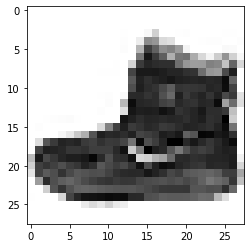

In [32]:
# let's sess one image
plt.imshow(train_images[0], cmap = 'Greys');

In [43]:
# let's build a first classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    
    # adding these two intermediate layers I go from 0.85 to 0.88 validation accuracy
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [54]:
# let's see how many parameters, etc
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [46]:
EPOCHS = 60
BATCH_SIZE = 256

history = model.fit(train_images, train_labels, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_split = 0.1)

Epoch 1/60
211/211 [==============================] - 1s 3ms/step - loss: 17.6189 - accuracy: 0.5264 - val_loss: 1.0053 - val_accuracy: 0.7243
Epoch 2/60
211/211 [==============================] - 1s 4ms/step - loss: 0.9128 - accuracy: 0.7398 - val_loss: 0.7833 - val_accuracy: 0.7730
Epoch 3/60
211/211 [==============================] - 1s 3ms/step - loss: 0.7024 - accuracy: 0.7827 - val_loss: 0.6535 - val_accuracy: 0.7973
Epoch 4/60
211/211 [==============================] - 1s 3ms/step - loss: 0.5995 - accuracy: 0.8093 - val_loss: 0.5754 - val_accuracy: 0.8175
Epoch 5/60
211/211 [==============================] - 1s 3ms/step - loss: 0.5289 - accuracy: 0.8265 - val_loss: 0.5446 - val_accuracy: 0.8233
Epoch 6/60
211/211 [==============================] - 1s 3ms/step - loss: 0.4757 - accuracy: 0.8418 - val_loss: 0.5060 - val_accuracy: 0.8252
Epoch 7/60
211/211 [==============================] - 1s 3ms/step - loss: 0.4455 - accuracy: 0.8488 - val_loss: 0.4966 - val_accuracy: 0.8373
Epoch

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy =  history.history['accuracy']
val_accuracy =  history.history['val_accuracy']

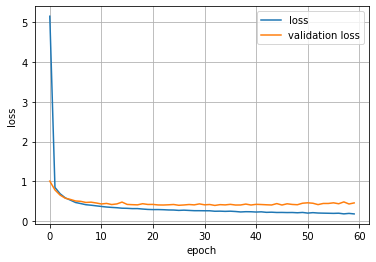

In [48]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(loss, label = 'loss')
plt.plot(val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.grid();

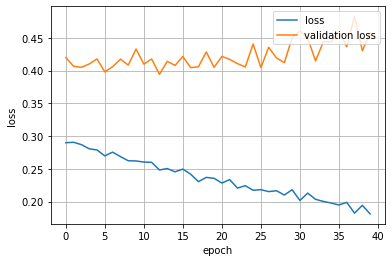

In [49]:
# wants to see if it starts overfitting
START = 20

plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(loss[START:], label = 'loss')
plt.plot(val_loss[START:], label = 'validation loss')
plt.legend(loc = 'upper right')
plt.grid();

In [ ]:
# ok it has slightly started overfitting.. as we can see from epochs 15 validation loss becomes higher and training loss is still decreasing

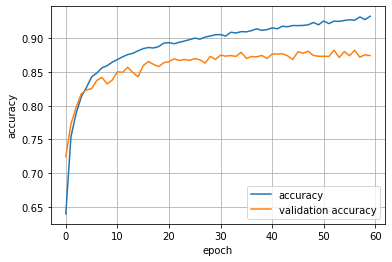

In [50]:
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(accuracy, label = 'accuracy')
plt.plot(val_accuracy, label = 'validation accuracy')
plt.legend(loc = 'lower right')
plt.grid();

In [53]:
loss, acc = model.evaluate(test_images, test_labels)

print('')
print('Test accuracy is:', acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.8738

Test accuracy is: 0.8737999796867371
